In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
import math
import scipy.fftpack

# enostavna implementacija DCT

In [12]:
def DCT(matrix): # DCT po definiciji(se ne uporablja)
    m, n = matrix.shape

    dct = np.zeros((m,n))

    for u in range(m):
        for v in range(n):
 
            if (u == 0):
                alpha_u = (1 / m) ** 0.5
            else:
                alpha_u = (2 / m) ** 0.5
            if (v == 0):
                alpha_v = (1 / n) ** 0.5
            else:
                alpha_v = (2 / n) ** 0.5
 
            sum = 0
            for i in range(m):
                for j in range(n):
                    dctTemp = matrix[i][j] * (
                           math.cos(math.pi * (2 * i + 1) * u / (2 * m))) * (
                           math.cos(math.pi * (2 * j + 1) * v / (2 * n)))
                    sum = sum + dctTemp
                
            dct[u][v] = alpha_u * alpha_v * sum
    return dct

# testiranje implementacije DCT

In [13]:
# matrix = np.array([[255, 255, 255, 255, 255, 255, 255, 255],
#           [255, 255, 255, 255, 255, 255, 255, 255],
#           [255, 255, 255, 255, 255, 255, 255, 255],
#           [255, 255, 255, 255, 255, 255, 255, 255],
#           [255, 255, 255, 255, 255, 255, 255, 255],
#           [255, 255, 255, 255, 255, 255, 255, 255],
#           [255, 255, 255, 255, 255, 255, 255, 255],
#           [255, 255, 255, 255, 255, 255, 255, 255]])
# matrix = np.array([
#     [139, 144, 149, 153, 155, 155, 155, 155],
#     [144, 151, 153, 156, 159, 156, 156, 156],
#     [150, 155, 160, 163, 158, 156, 156, 156],
#     [159, 161, 162, 160, 160, 159, 159, 159],
#     [159, 160, 161, 162, 162, 155, 155, 155],
#     [161, 161, 161, 161, 160, 157, 157, 157],
#     [162, 162, 161, 163, 162, 157, 157, 157],
#     [162, 162, 161, 161, 163, 158, 158, 158],

# ])

# dct = DCT(matrix-128)
# print(dct)
# print(scipy.fftpack.dctn(matrix-128, norm = 'ortho'))

# inverzna DCT

In [14]:
def inverseDCT(matrika):
    m, n = matrika.shape

    inverse_dct = np.zeros((m,n))

    for x in range(m):
        for y in range(n): 
            vsota = 0
            for u in range(m):
                for v in range(n):
                    if (u == 0):
                        alpha_u = (1 / m) ** 0.5
                    else:
                        alpha_u = (2 / m) ** 0.5
                    if (v == 0):
                        alpha_v = (1 / n) ** 0.5
                    else:
                        alpha_v = (2 / n) ** 0.5
                    
                    dctTemp = alpha_u * alpha_v * matrika[u][v] * (
                           math.cos(math.pi * (2 * x + 1) * u / (2 * m))) * (
                           math.cos(math.pi * (2 * y + 1) * v / (2 * n)))
                    vsota = vsota + dctTemp
            inverse_dct[x][y] = vsota
    return inverse_dct

# testiranje implementacije inverzne DCT

In [15]:
# inverse_dct = inverseDCT(np.array([
#     [2.04000000e+03, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0]]))
# print(inverse_dct)

# preslikava slike v DCT, kjer nastavljamo koeficiente na 0

In [16]:
def imageToDCT(image, N, numLines = 0, paddingType = cv2.BORDER_REPLICATE):   
    # deluje za sliko z enim barvnim kanalom
    # cv2.BORDER_REPLICATE replicira najbolj robni piksel večkrat z isto vrednostjo
    # če damo numLines = 0 potem bomo vzeli vključno z največjo diagonalo. >0 pomeni,da bomo več linij odstranli, <0 pomeni, da bomo manj linij odstranli
    m, n = image.shape
    mPad = (N - m % N) % N  # število potrebnih pikslov paddinga
    nPad = (N - n % N) % N  
    imagePadded = cv2.copyMakeBorder(image, 0, mPad, 0, nPad, paddingType) # doda rob spodaj in desno
    mNew, nNew = imagePadded.shape # velikost nove paddane slike
    if mNew%N != 0 or nNew%N != 0: # preverimo, če je prišlo pri padddingu do napake
        print("Napaka pri paddingu slike")

    dctSquares = np.zeros((mNew//N, nNew//N, N, N)) # matrika kamor bomo shranili DCT za NxN kvadrate(zaenkrat 4d array)

    for i in tqdm(range(mNew//N)):
        for j in range(nNew//N):
            #dctTemp = DCT(imagePadded[i*N : (i*N+N), j*N : (j*N+N)]) # izračun DCT po definiciji z lastno implementacijo
            dctTemp = scipy.fftpack.dctn(imagePadded[i*N : (i*N+N), j*N : (j*N+N)], norm = 'ortho')# pobere zaporedne kvadrate NxN velikosti in izračuna DCT na njih
            dctSquares[i, j] = np.triu(dctTemp[:,::-1], numLines)[:,::-1]   # slaba implementacija, mogo bi znotraj funkcije samo sem poenostavo
                                                                            # [:,::-1] zrcali matriko po vertikalni osi, da s funkcijo triu(vrne zgornje trikotno matriko) dobimo najbolj 
                                                                            # pomembne podatke za DCT (ostali so zaenkrat 0) in nato nazaj zrcalimo. Z zadnjim parametrom določimo koliko vrstic nad oz pod diagonalo še vzamemo.
    return dctSquares, mPad, nPad # vrnemo dct kvadratov in velikost za koliko smo paddali sliko, da bomo kasneje lahko dobili nazaj originalno velikost slike

# preslikava DCT nazaj v sliko

In [17]:
def DCTtoImage(DCT, N, mPad, nPad): #deluje za sliko z enim barvnim kanalom
    m, n,_ ,_ = DCT.shape

    image = np.zeros((m*N, n*N))
    
    for i in tqdm(range(m)):
        for j in range(n):
            # image[(i*N) : (i*N+N), (j*N) : (j*N+N)] = inverseDCT(DCT[i, j]) # lastna implementacija inverseDCT
            image[(i*N) : (i*N+N), (j*N) : (j*N+N)] = scipy.fftpack.idctn(DCT[i, j], norm = 'ortho')

    return image[0:image.shape[0]-mPad,0:image.shape[1]-nPad].astype(np.uint8)    # vrnemo sliko kjer smo odrezali padding, ki smo ga dodali. Za obrezovanje :-mPad ne deluje ker je možno, da je mPad=0

# Izračun DCT 9x9 slike

In [18]:
matrix = np.array([[255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255]])
matrix = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9],
          [1, 2, 3, 4, 5, 6, 7, 8, 9]])
matrix = np.arange(289).reshape((17,17))
# print(matrix)

# upper = np.triu(matrix[:,::-1], 2)[:,::-1]  # [:,::-1] zrcali matriko po vertikalni osi, da s funkcijo triu(vrne zgornje trikotno matriko) dobimo najbolj pomembne podatke za DCT(ostali so zaenkrat 0) 
#                                             # in nato nazaj zrcalimo. Z zadnjim parametrom določimo koliko vrstic nad oz pod diagonalo še vzamemo.
# print(upper)

image_dct, mPad, nPad = imageToDCT(matrix, 8, numLines = 3)
# print(image_dct)
# print("mPad: ", mPad, " nPad: ", nPad)
imageBack = DCTtoImage(image_dct, 8, mPad, nPad)


# print("original", matrix)
# print("povratek", imageBack)

100%|██████████| 3/3 [00:00<00:00, 374.76it/s]


# Izračun DCT slike, kjer ohranimo različno število koeficientov

[[ 89  88  80 ... 163 163 164]
 [ 89  91  84 ... 163 163 163]
 [ 90  93  87 ... 165 163 162]
 ...
 [ 86  84  89 ... 164 161 163]
 [ 87  84  86 ... 165 162 164]
 [ 88  88  89 ... 167 163 164]]


 41%|████      | 26/64 [00:00<00:00, 258.21it/s]

100%|██████████| 64/64 [00:00<00:00, 531.69it/s]


original [[163 162 161 ... 170 154 130]
 [162 162 162 ... 173 155 126]
 [162 162 163 ... 170 155 128]
 ...
 [ 43  42  51 ... 103 101  99]
 [ 41  42  55 ... 103 105 106]
 [ 42  44  57 ... 102 106 109]]
povratek [[  1   1   3   4   4   5   7   7   9   9  11  12  12  13  15  15  17]
 [ 15  15  17  18  19  20  21  22  23  23  25  26  27  28  29  30  31]
 [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50]
 [ 52  52  54  55  55  56  58  58  60  60  62  63  63  64  66  66  67]
 [ 67  67  69  70  70  71  73  73  75  75  77  78  78  79  81  81  83]
 [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100]
 [103 104 105 106 107 108 110 110 111 112 113 114 115 116 118 118 119]
 [118 118 120 121 121 122 124 124 126 126 128 129 129 130 132 132 133]
 [137 137 139 140 140 141 143 143 145 145 147 148 148 149 151 151 153]
 [151 151 153 154 155 156 157 158 159 159 161 162 163 164 165 166 167]
 [170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186]
 [188 188

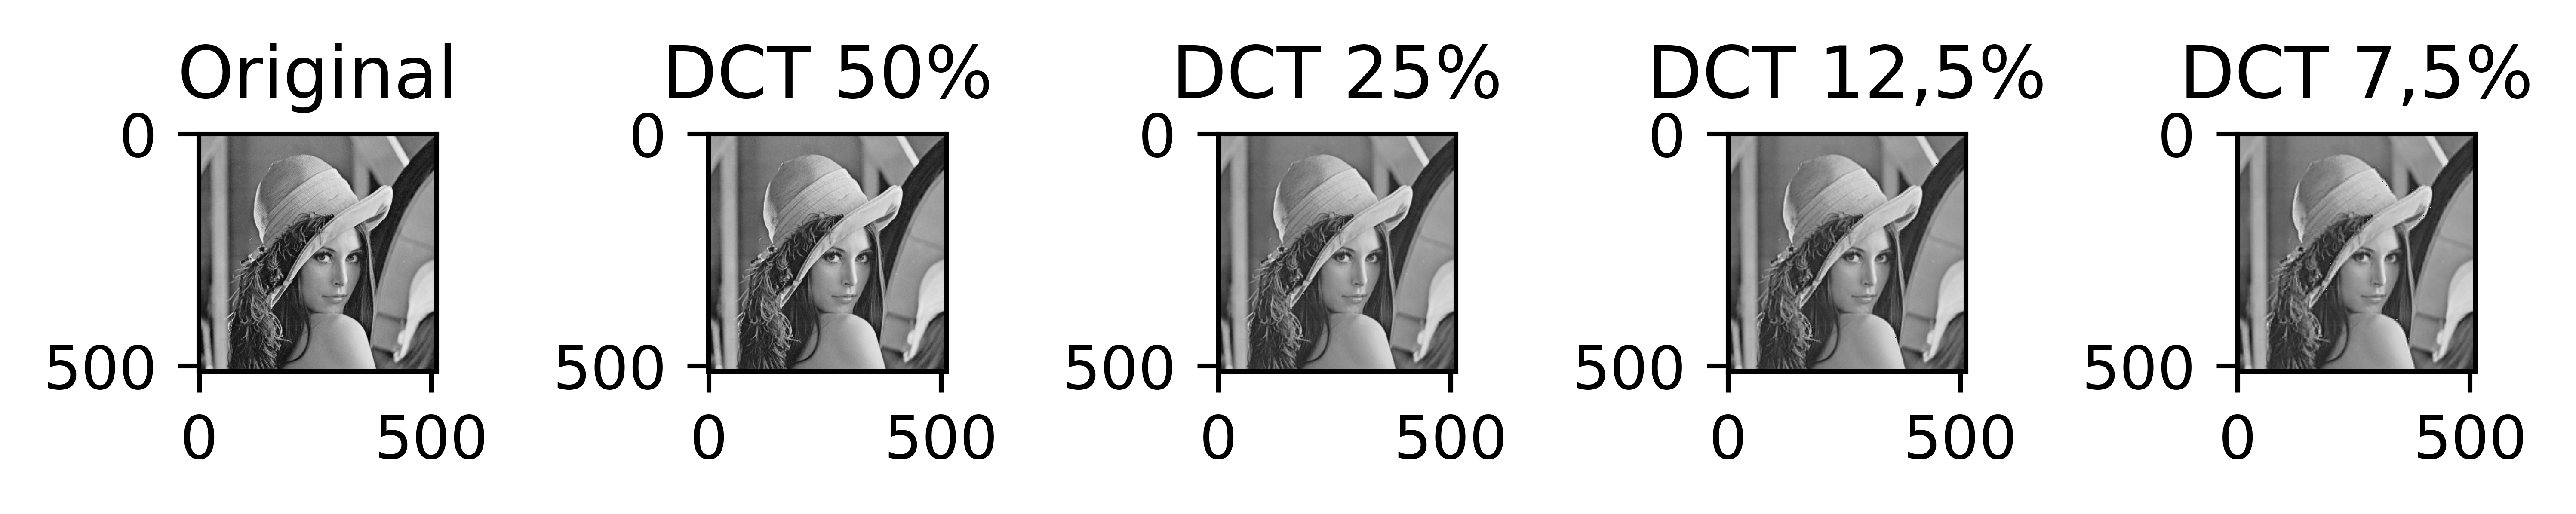

In [19]:
plt.figure(dpi=1000)
# plt.figure(dpi=300)


I = cv2.imread('images/lena.png')
I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

print(I_gray[100:108])

image_dct1, mPad1, nPad1 = imageToDCT(I_gray, 8, numLines = 1) # 44% dct elemetov. Ni dejnsko toliko manj podatkov, ker še uporabljam float za DCT
image_dct2, mPad2, nPad2 = imageToDCT(I_gray, 8, numLines = 3) # 23% dct elementov
image_dct3, mPad3, nPad3 = imageToDCT(I_gray, 8, numLines = 4) # 15,6% dct elementov
image_dct4, mPad4, nPad4 = imageToDCT(I_gray, 8, numLines = 5) # 9,4% dct elementov
# print(image_dct)
imageBack1 = DCTtoImage(image_dct1, 8, mPad1, nPad1)
imageBack2 = DCTtoImage(image_dct2, 8, mPad2, nPad2)
imageBack3 = DCTtoImage(image_dct3, 8, mPad3, nPad3)
imageBack4 = DCTtoImage(image_dct4, 8, mPad4, nPad4)


print("original", I_gray)
print("povratek", imageBack)


plt.subplot(1, 5, 1)
plt.tight_layout()
plt.imshow(I_gray, cmap = "gray")
plt.title("Original")

plt.subplot(1, 5, 2)
plt.tight_layout()
plt.imshow(imageBack1, cmap = "gray")
plt.title("DCT 50%")

plt.subplot(1, 5, 3)
plt.tight_layout()
plt.imshow(imageBack2, cmap = "gray")
plt.title("DCT 25%")

plt.subplot(1, 5, 4)
plt.tight_layout()
plt.imshow(imageBack3, cmap = "gray")
plt.title("DCT 12,5%")

plt.subplot(1, 5, 5)
plt.tight_layout()
plt.imshow(imageBack4, cmap = "gray")
plt.title("DCT 7,5%")

plt.show()
